# Tools for Analyzing Time Series of Satellite Imagery (TATSSI)

In [1]:
import sys
sys.path.append ("/home/glopez/Projects/TATSSI")

# Notebook helpers
from TATSSI.notebooks.helpers.utils import PlotTimeSeries

## Explore time series

<IPython.core.display.Javascript object>


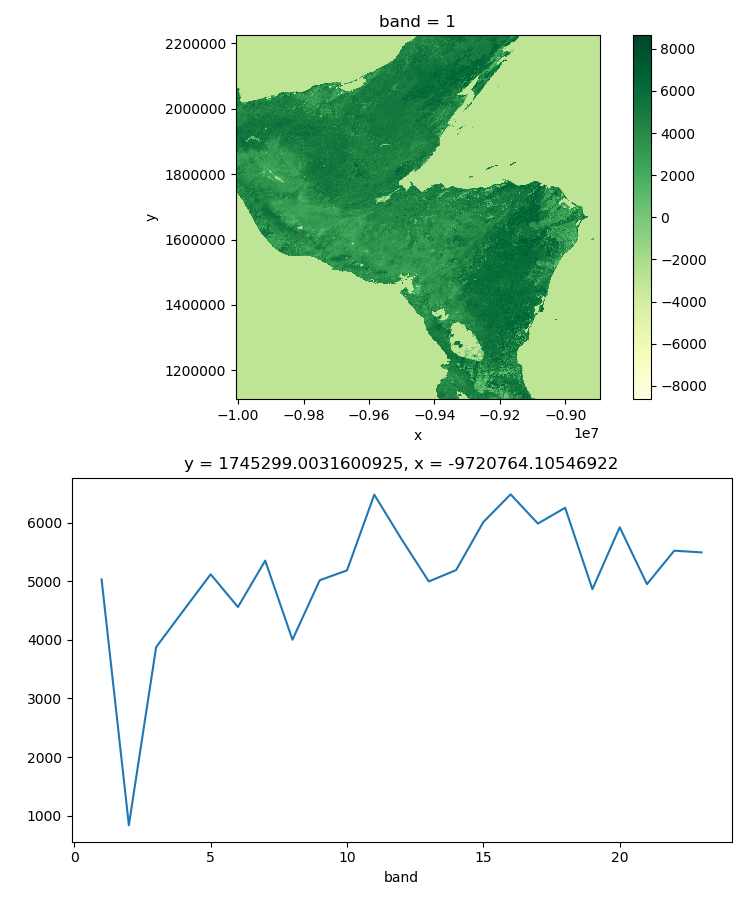

In [2]:
# Time series of EVI
fname = "../../data/MOD13A2.006/VRTs/EVI.vrt"

p = PlotTimeSeries()


p.plot(fname)

## Explore time series

## Perform interpolation and or temporal aggregation